In [2]:
from datetime import datetime 

In [3]:
my_year= 2003
my_month = 9
my_date = 20
my_hour = 16
my_min = 35
my_second = 52


In [4]:
my_date = datetime(my_year,my_month,my_date,my_hour,my_min,my_second)


In [5]:
my_date

datetime.datetime(2003, 9, 20, 16, 35, 52)

In [6]:
import numpy as np 


In [11]:
np.array(['2020-03-15','2021-03-16','2020-03-17','2020-03-18'],dtype='datetime64[D]')

array(['2020-03-15', '2021-03-16', '2020-03-17', '2020-03-18'],
      dtype='datetime64[D]')

In [12]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

 # In Pandas

In [13]:
import pandas as pd 

In [14]:
pd.date_range(start='2020-03-15',end='2020-03-20',freq='D')

DatetimeIndex(['2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20'],
              dtype='datetime64[ns]', freq='D')

# Time Shiting

In [16]:
df = pd.read_csv('starbucks.csv',index_col='Date', parse_dates=True )

In [17]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [18]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [19]:

df.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [ ]:
df.shift(periods=1,freq ='ME').head() #everything is shifted to the end of the month

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


# Rolling and Expanding

In [22]:
%matplotlib inline

In [23]:
df = pd.read_csv('starbucks.csv',index_col='Date', parse_dates=True )

In [24]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<Axes: xlabel='Date'>

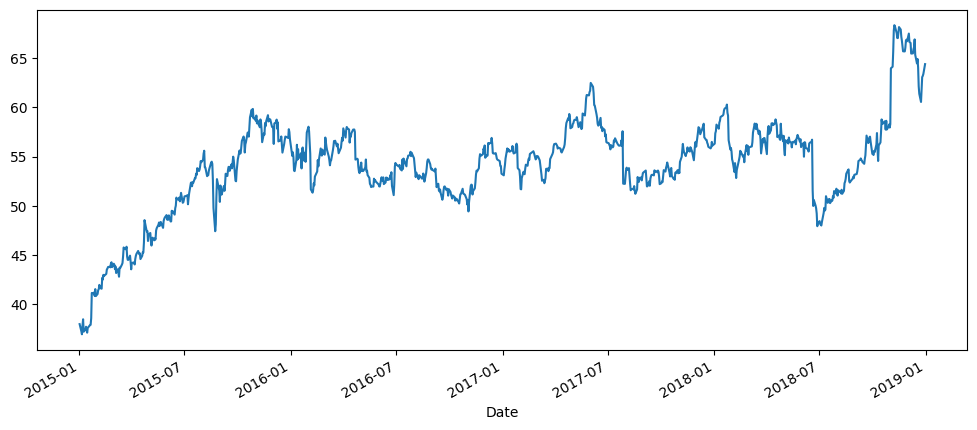

In [29]:
df['Close'].plot(figsize=(12,5))

In [30]:
df.rolling(window=7).mean()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
...,...,...
2018-12-24,63.270000,1.528625e+07
2018-12-26,62.947143,1.525942e+07
2018-12-27,62.765714,1.471157e+07


<Axes: xlabel='Date'>

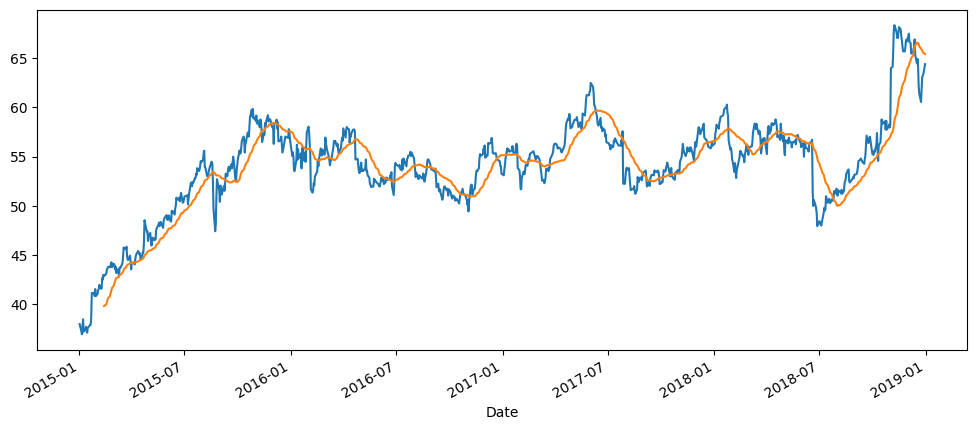

In [ ]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=30).mean()['Close'].plot()# window = 30 means that 

In [36]:
df['Close:30 Day Mean'] = df['Close'].rolling(window=30).mean()

In [34]:
df.head()

,Close,Volume,Close:30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


<Axes: xlabel='Date'>

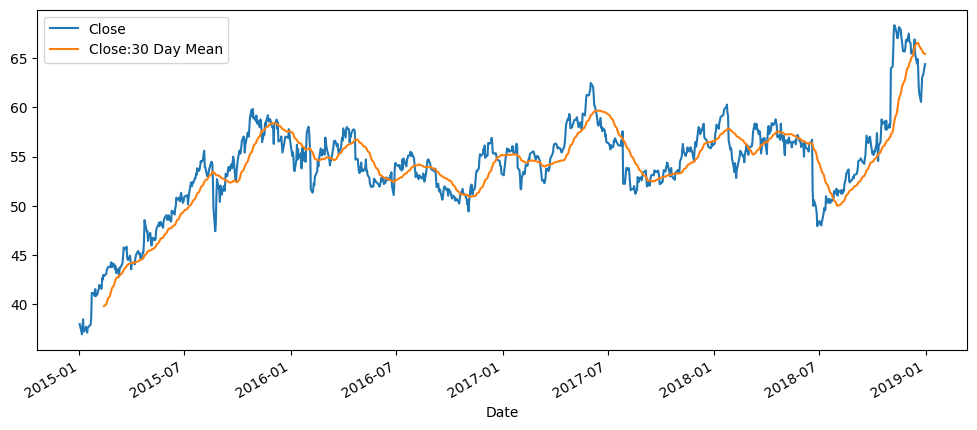

In [37]:
df[['Close','Close:30 Day Mean']].plot(figsize=(12,5))

<Axes: xlabel='Date'>

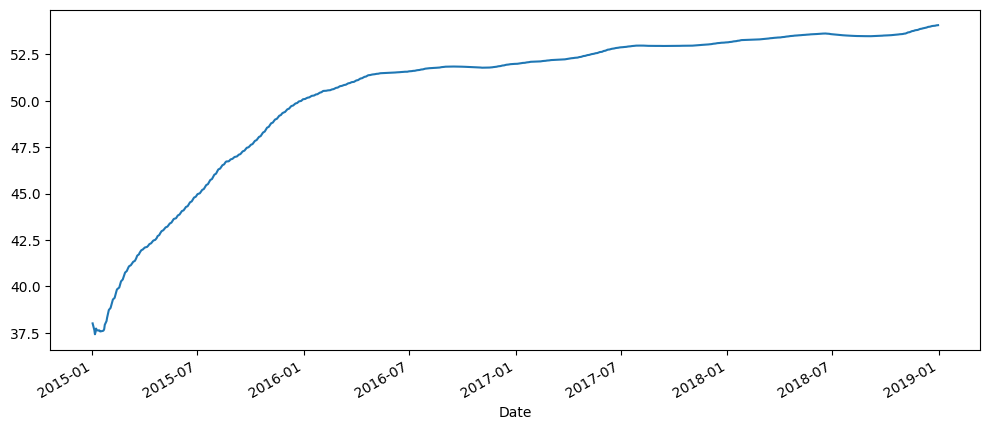

In [38]:
df['Close'].expanding().mean().plot(figsize=(12,5))

# Visualising Time Series Data 

In [39]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

<Axes: xlabel='Date'>

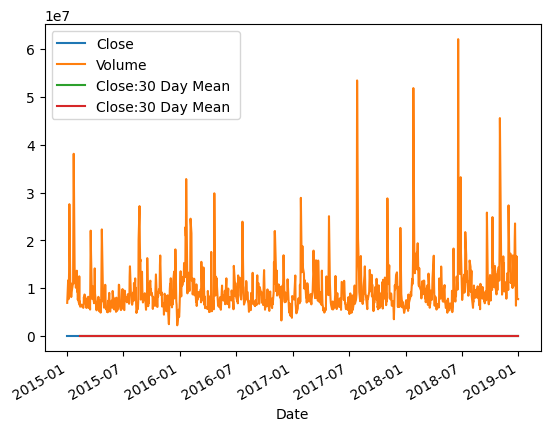

In [40]:
df.plot()

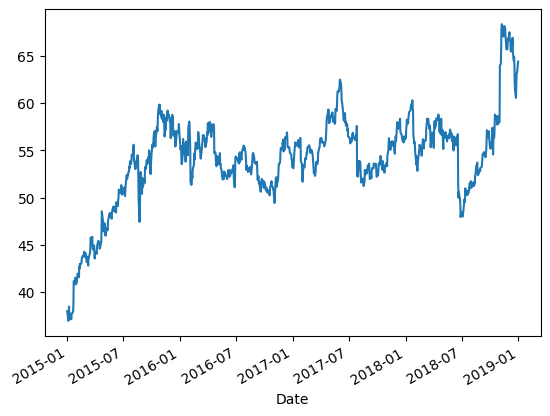

In [43]:
df['Close'].plot();

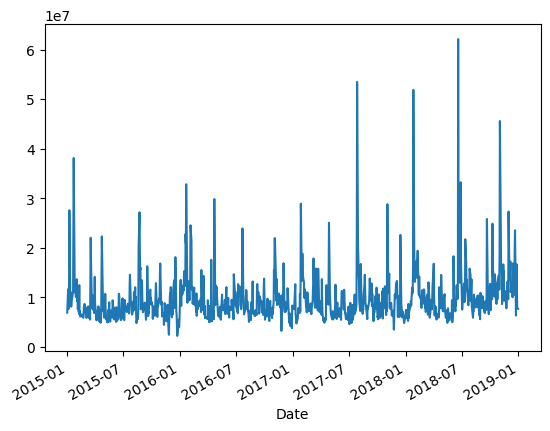

In [44]:
df['Volume'].plot();

[Text(0.5, 0, 'X LABEL'), Text(0, 0.5, 'Y LABEL')]

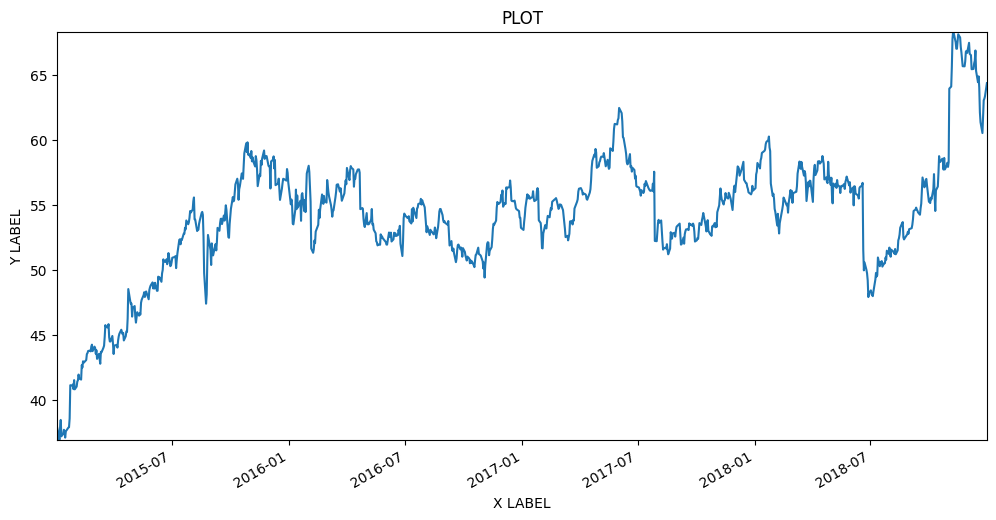

In [49]:
title = 'PLOT'
ylabel ='Y LABEL' 
xlabel ='X LABEL'

ax=df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='both',tight = True)
ax.set(xlabel=xlabel,ylabel=ylabel)



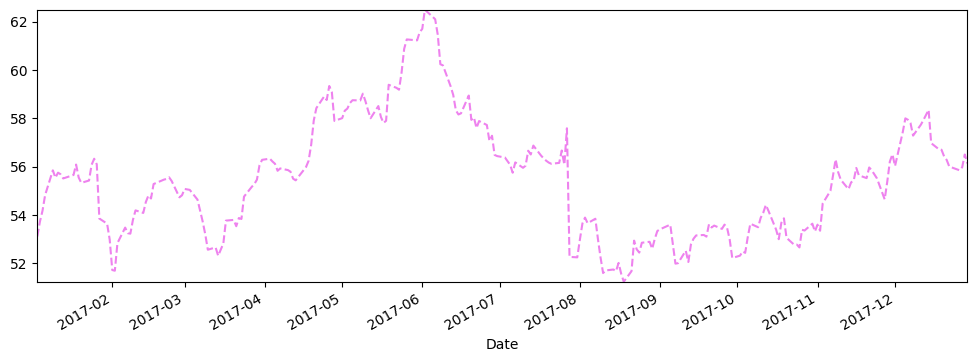

In [53]:
bx=df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4),ls='--',c='violet')
bx.autoscale(axis='both',tight = True)


In [54]:
from matplotlib import dates 

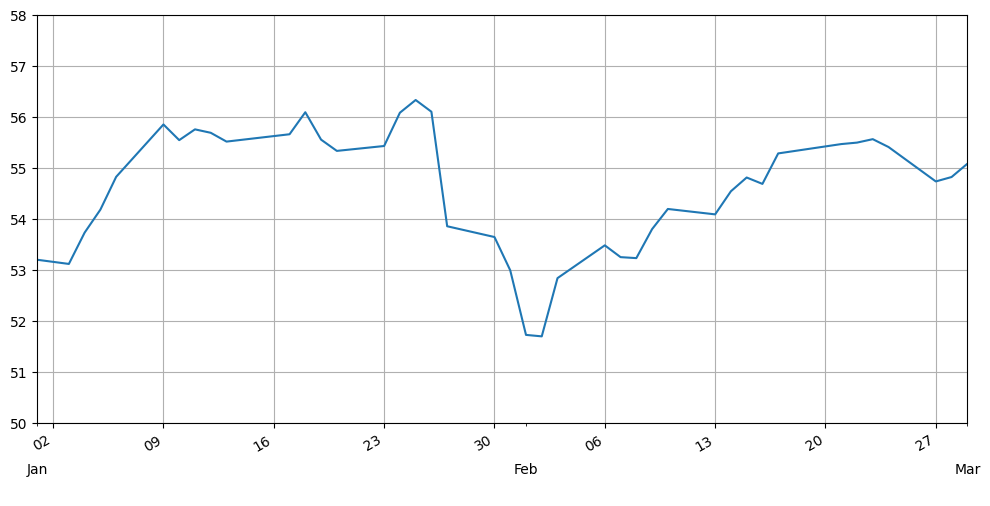

In [66]:
ax=df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,58],figsize=(12,6))
ax.set(xlabel=" ")
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d')) #the format of the date

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))
ax.grid(True)
